In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Emincan\Desktop\Dojo-Projects-Local\DATA\Beijing PM2.5\PRSA_data_2010.1.1-2014.12.31.csv')

target_col = 'pm2.5'

print(f"DF shape :{df.shape}")

df.head()

DF shape :(43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
df.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [4]:
df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [5]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

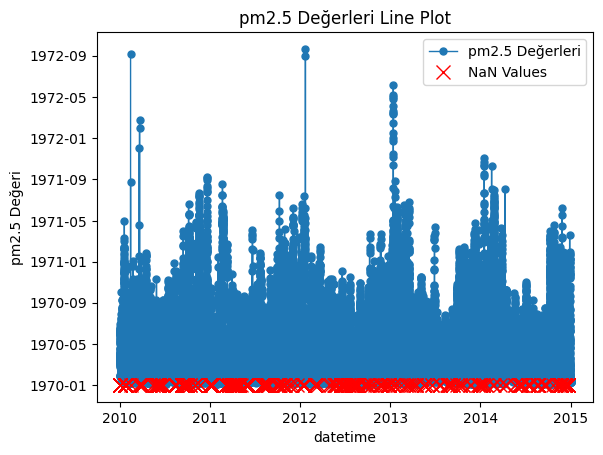

In [6]:
# NaN değerleri tespit etme
nan_mask = pd.isna(df['pm2.5'])

# Line plot çizdirme
plt.plot(df['datetime'], df['pm2.5'], marker='o', markersize=5, linewidth=1, label='pm2.5 Değerleri')
plt.plot(df['datetime'][nan_mask], np.zeros_like(df['datetime'][nan_mask]), 'rx', markersize=10, label='NaN Values')
plt.xlabel('datetime')
plt.ylabel('pm2.5 Değeri')
plt.title('pm2.5 Değerleri Line Plot')
plt.legend()
plt.show()

In [7]:
# Total Summary

def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))
    
check_data(df, 'Train data')
print('-'*100)
# check_data(df_test, 'Test data')
# print('-'*100)
# check_data(original, 'Original data')

c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\pandas\io\formats\style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\pandas\io\formats\style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax
c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\matplotlib\colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,nan,-21,-11.000000,1021.000000,NW,1.790000,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,nan,-21,-12.000000,1020.000000,NW,4.920000,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,nan,-21,-11.000000,1019.000000,NW,6.710000,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,nan,-21,-14.000000,1019.000000,NW,9.840000,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,nan,-20,-12.000000,1018.000000,NW,12.970000,0,0,2010-01-01 04:00:00


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
Unique Value Count,43824,5,12,31,24,581,69,64,60,4,2788,28,37,43824


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,0,0,0,0,0,2067,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        43824 non-null  int64         
 1   year      43824 non-null  int64         
 2   month     43824 non-null  int64         
 3   day       43824 non-null  int64         
 4   hour      43824 non-null  int64         
 5   pm2.5     41757 non-null  float64       
 6   DEWP      43824 non-null  int64         
 7   TEMP      43824 non-null  float64       
 8   PRES      43824 non-null  float64       
 9   cbwd      43824 non-null  object        
 10  Iws       43824 non-null  float64       
 11  Is        43824 non-null  int64         
 12  Ir        43824 non-null  int64         
 13  datetime  43824 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(8), object(1)
memory usage: 4.7+ MB


In [9]:
df = df.drop('datetime' , axis = 1)
df = df.drop('No' , axis = 1)

from sklearn.preprocessing import LabelEncoder
# LabelEncoder nesnesi oluşturma
label_encoder = LabelEncoder()
# "cbwd" sütununu Label Encoding işlemine tabi tutma
df["cbwd"] = label_encoder.fit_transform(df["cbwd"])

df['cbwd'] = df['cbwd'].astype('category')
df['year'] = df['year'].astype('category')
df['day'] = df['day'].astype('category')
df['hour'] = df['hour'].astype('category')


num_cols = df.select_dtypes(exclude=['object','category']).columns.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()

# Train | Test Split

In [10]:
df_train = df[~df[target_col].isna()]
df_test = df[df[target_col].isna()]

# EDA

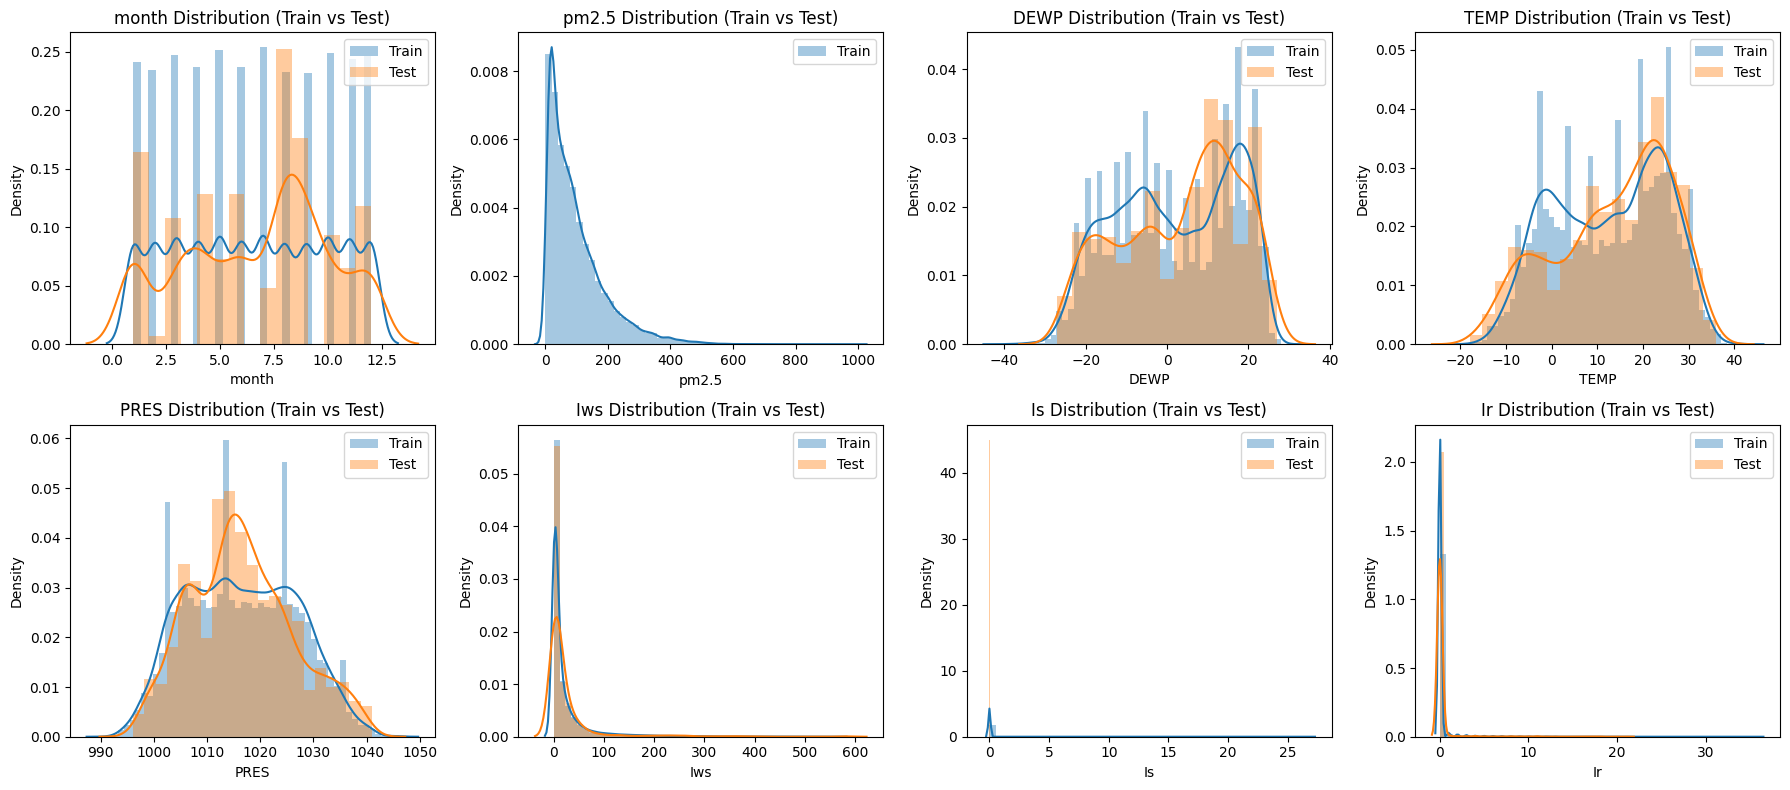

In [11]:
import warnings
warnings.filterwarnings("ignore")

def plot_histograms(df_train, df_test, target_col, n_cols=3):
    n_rows = (len(df_train.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df_train.columns.tolist()):
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:
                sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    plt.tight_layout()
    plt.show()

plot_histograms(df_train[num_cols], df_test[num_cols], target_col, n_cols=4)

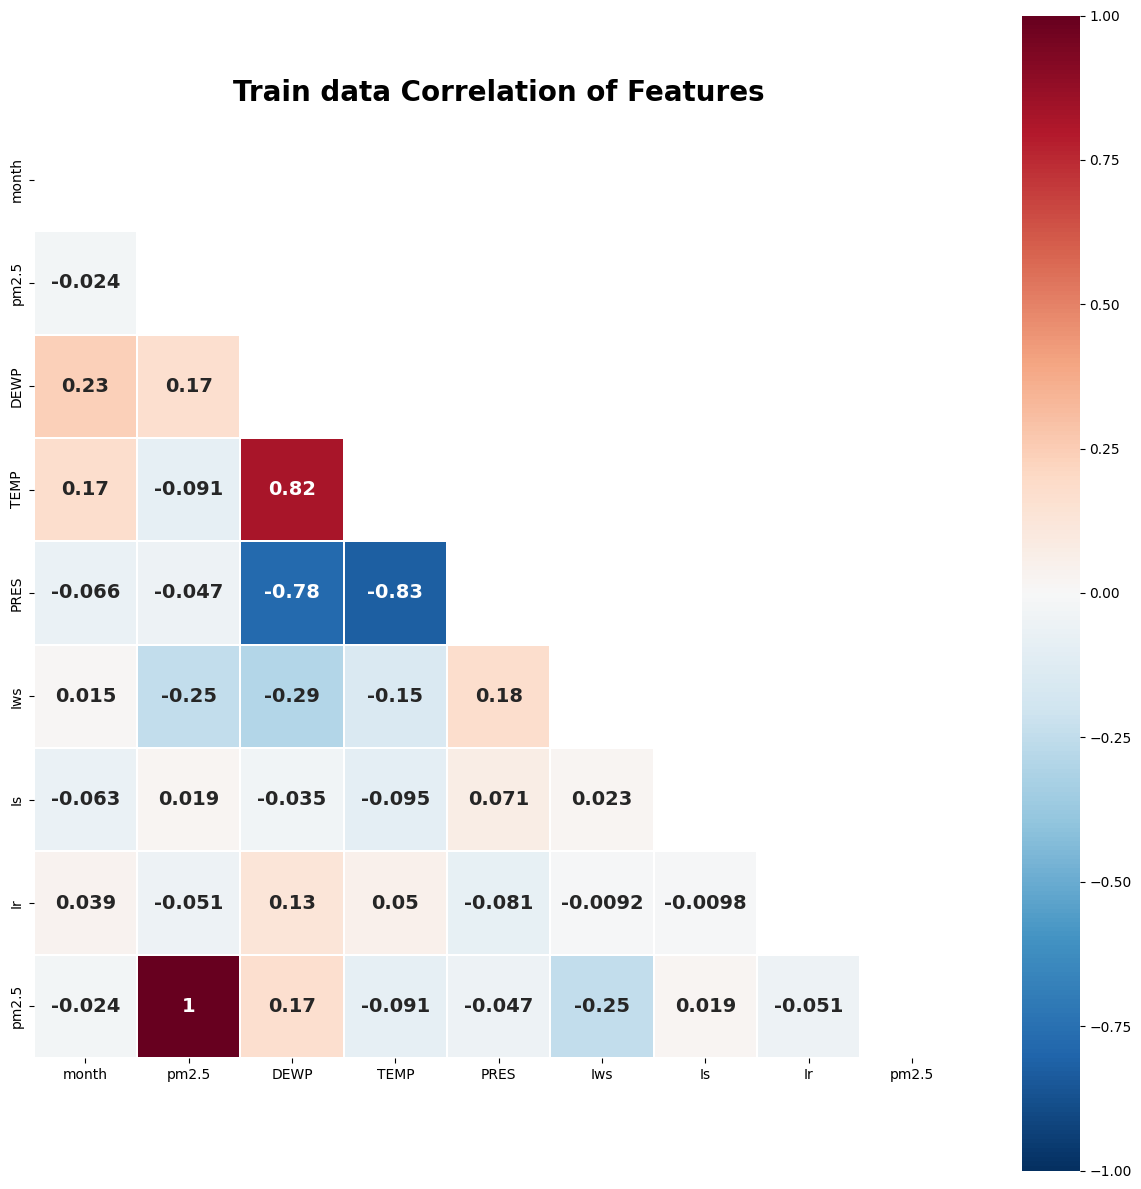

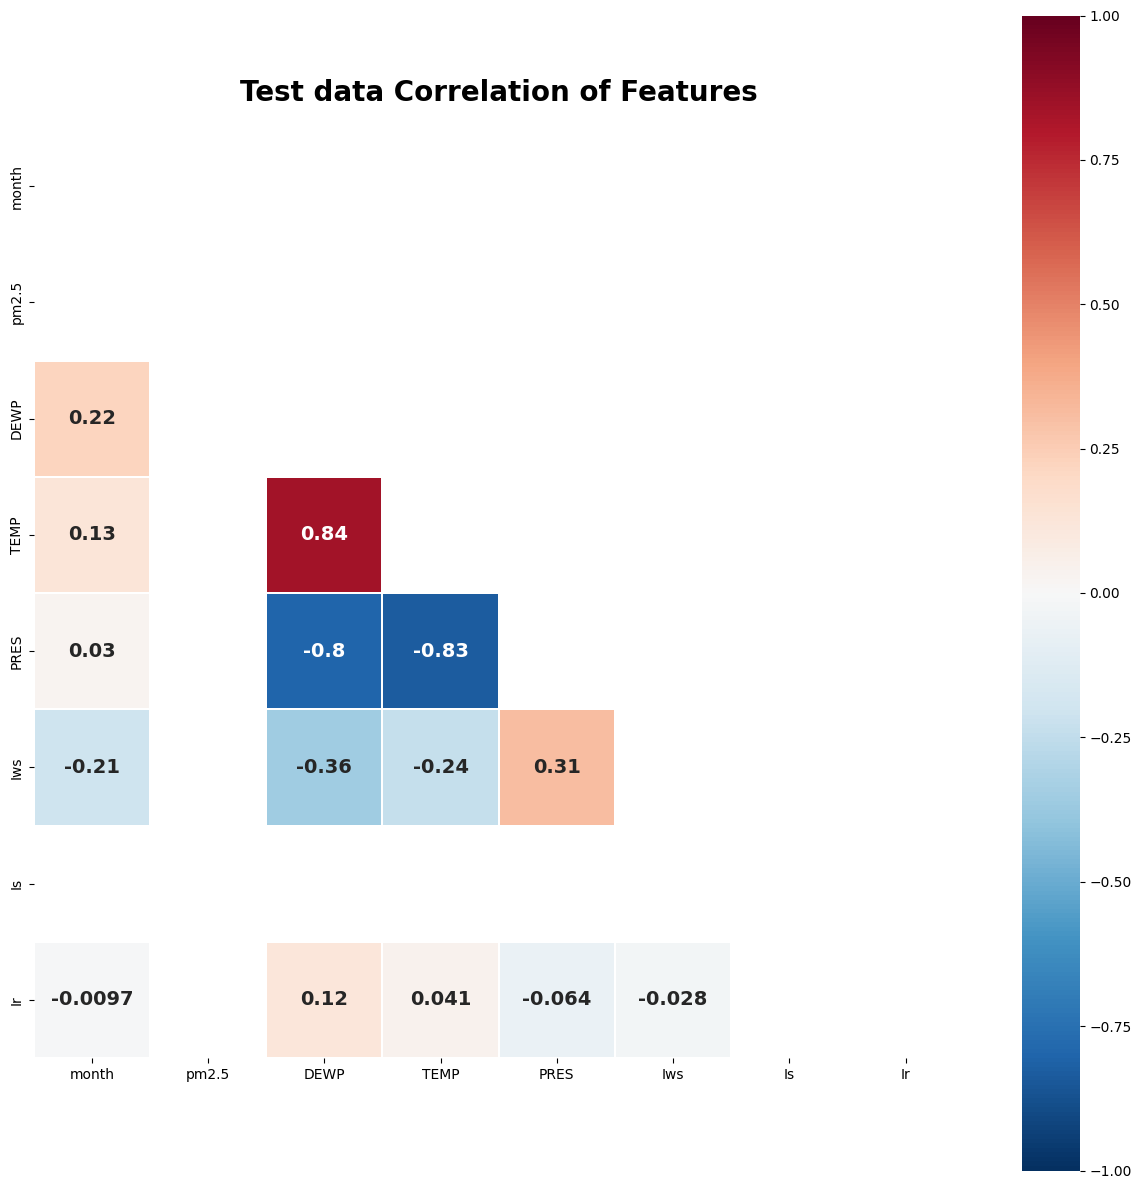

In [12]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(15, 15))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=20)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 14, "weight": "bold"},
                mask=mask)

plot_heatmap(df_train[num_cols+[target_col]], title='Train data')
plot_heatmap(df_test[num_cols], title='Test data')
# plot_heatmap(original[num_cols+[target_col]], title='original')

In [13]:
# def plot_distribution(df, hue, title='', drop_cols=[]):
#     sns.set_style('whitegrid')

#     cols = df.columns.drop([hue] + drop_cols)
#     n_cols = 2
#     n_rows = (len(cols) - 1) // n_cols + 1

#     fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))

#     for i, var_name in enumerate(cols):
#         row = i // n_cols
#         col = i % n_cols

#         ax = axes[row, col]
#         sns.histplot(data=df, x=var_name, kde=True, ax=ax, hue=hue) # sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
#         ax.set_title(f'{var_name} Distribution')

#     fig.suptitle(f'{title} Distribution Plot by {hue}', fontweight='bold', fontsize=16)
#     plt.tight_layout()
#     plt.show()
    

# plot_distribution(df_train, hue=cat_cols[1], title='Train data')
    
# plot_distribution(df_test, hue=cat_cols[1], title='Test data')
# # plot_distribution(original, hue='Sex', title='Original data')

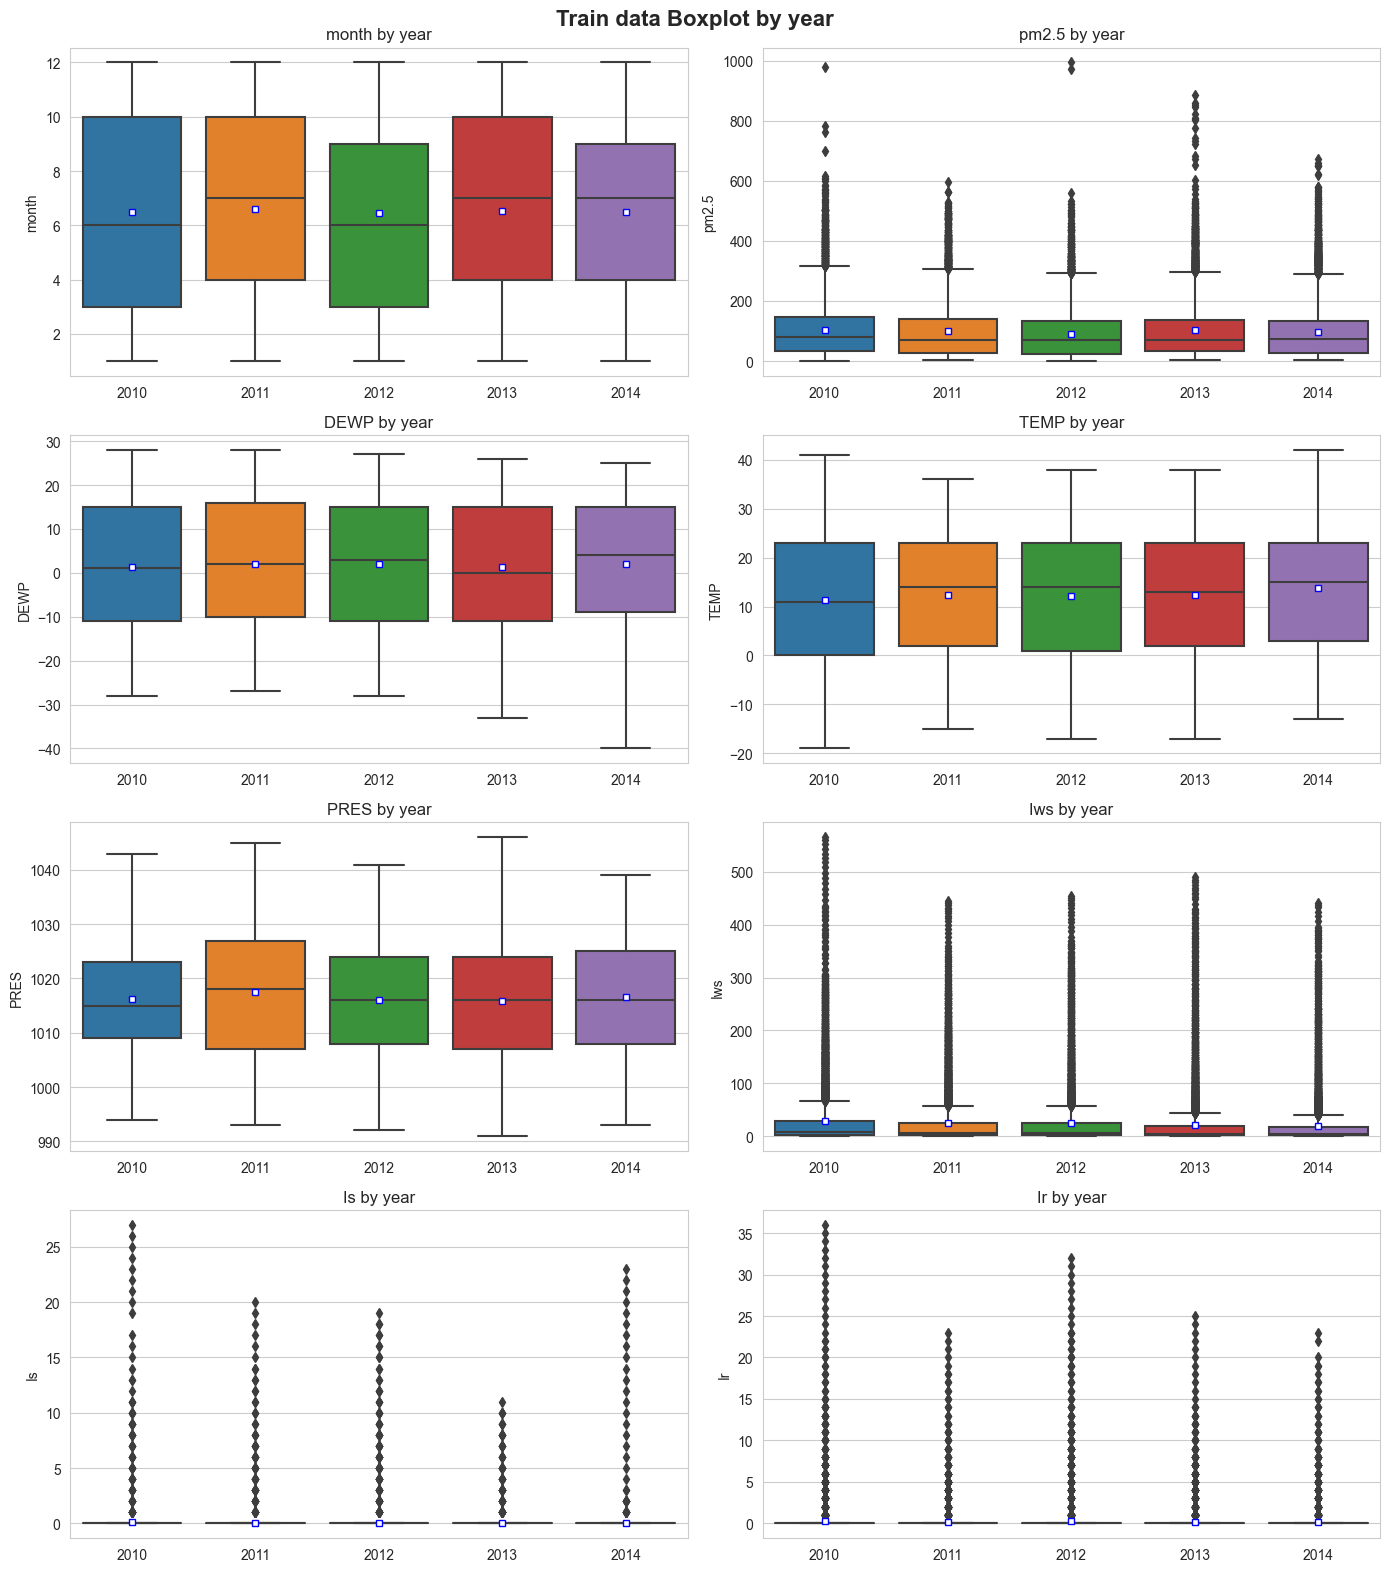

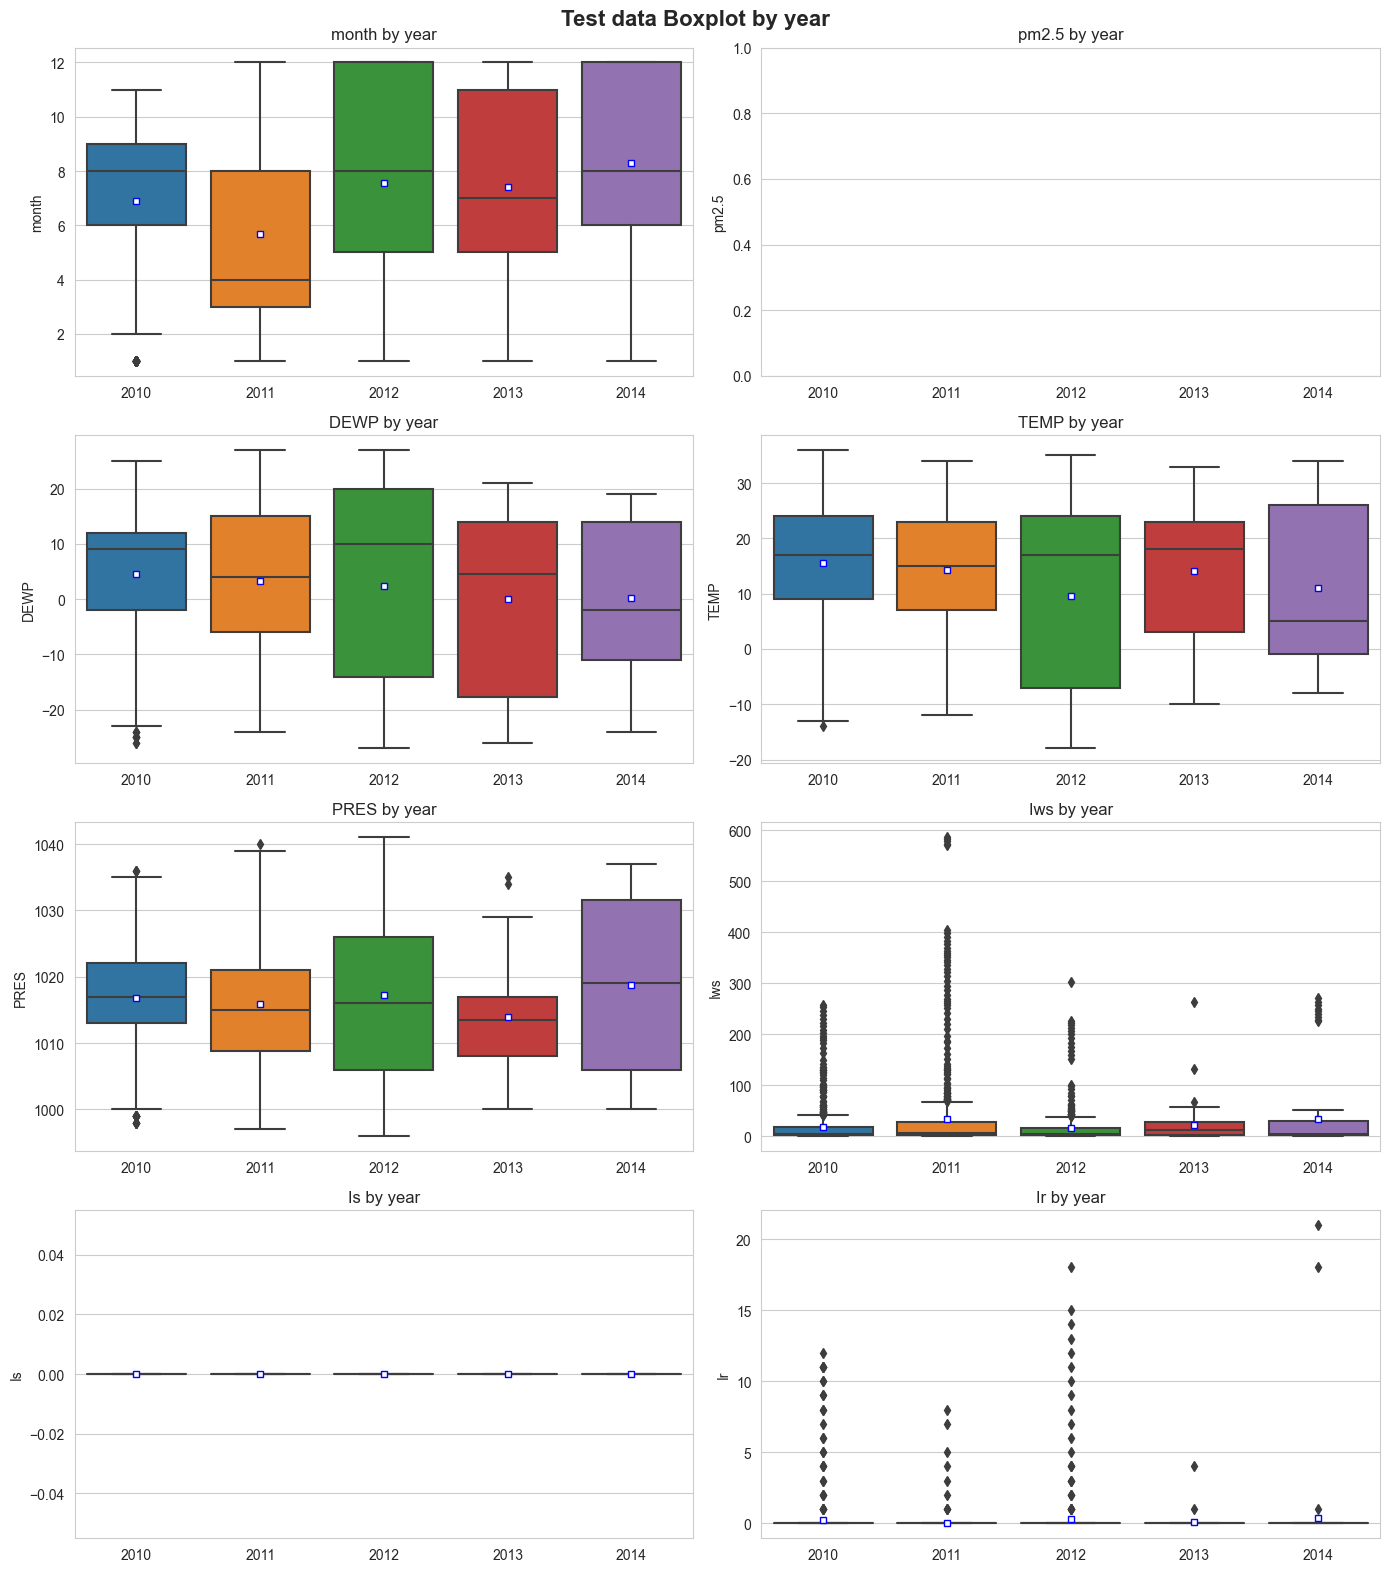

In [14]:
def plot_boxplot(df, hue, title='', drop_cols=[], n_cols=3):
    sns.set_style('whitegrid')

    cols = df.columns.drop(hue)
    cols = cols.drop(drop_cols)
    num_cols = [col for col in cols if col not in cat_cols]
    n_rows = (len(num_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))

    for i, var_name in enumerate(num_cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.boxplot(data=df, x=hue, y=var_name, ax=ax, showmeans=True, 
                    meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue", "markersize":"5"})
        ax.set_title(f'{var_name} by {hue}')
        ax.set_xlabel('')

    fig.suptitle(f'{title} Boxplot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()


plot_boxplot(df_train, hue=cat_cols[0], title='Train data', n_cols=2)
plot_boxplot(df_test, hue=cat_cols[0], title='Test data', n_cols=2)

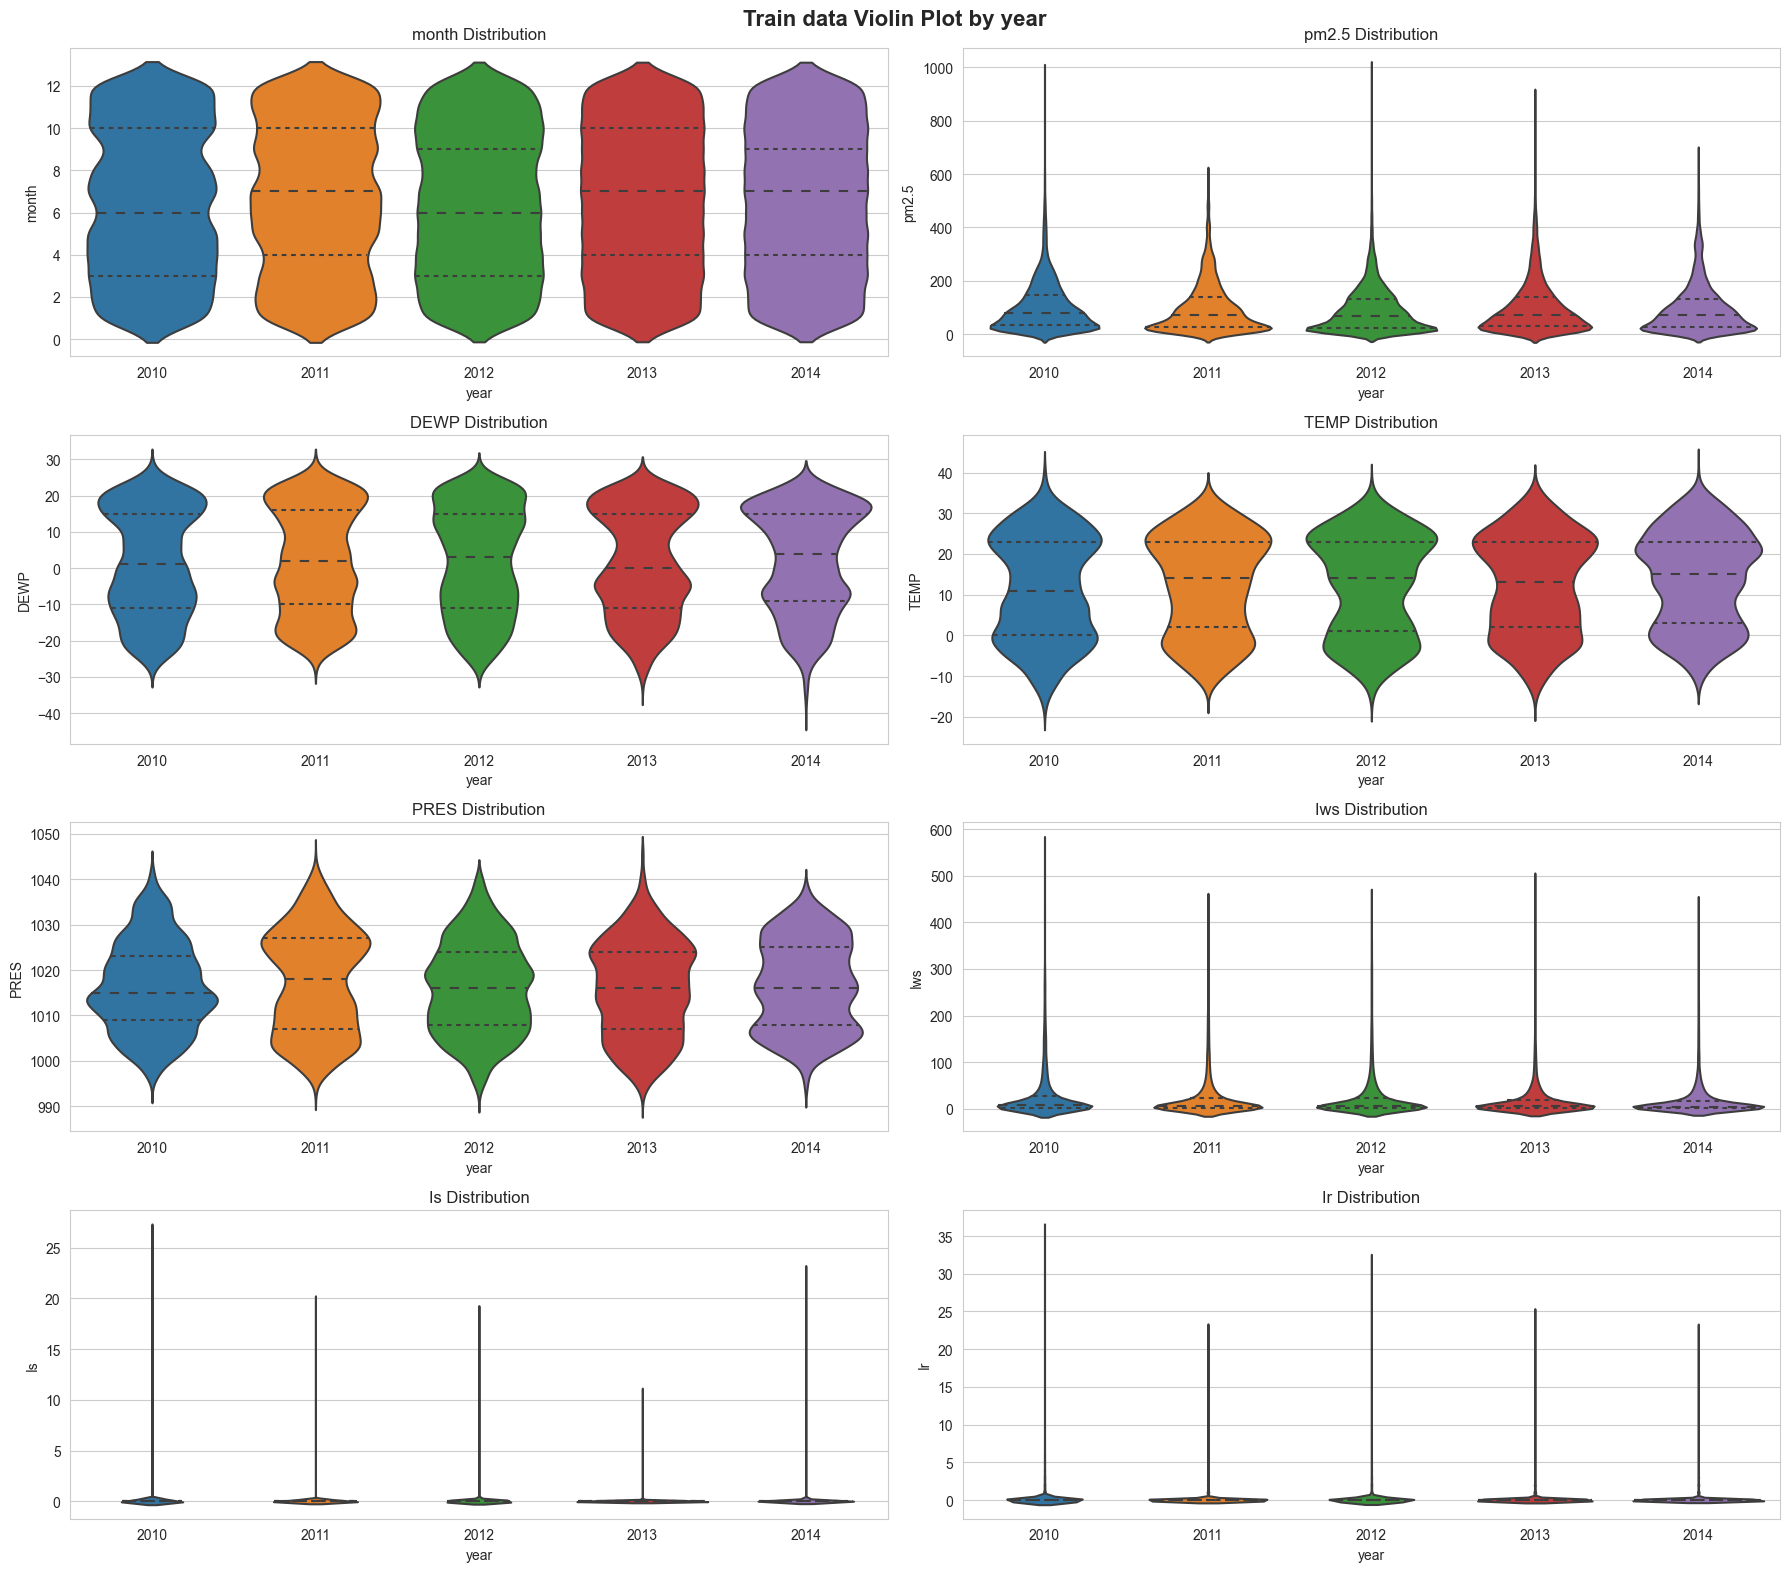

In [15]:
def plot_violinplot(df, hue, title='', drop_cols=[], n_cols=2):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    num_cols = [col for col in cols if col not in cat_cols]
    n_rows = (len(num_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))

    for i, var_name in enumerate(num_cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.violinplot(data=df, x=hue, y=var_name, ax=ax, inner='quartile')
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Violin Plot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_violinplot(df_train, hue=cat_cols[0], title='Train data', n_cols=2)

# Feature Engineering

In [16]:
# # Choose the tactics
# CFG.encoder = True
# CFG.height_solver = True
# CFG.scaler = True

# Functions(Utils)

In [6]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE , ADASYN

class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Fertility'
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model' , task = 'reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        
        if task == 'class':
            print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
            print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}')
            print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
            print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Test Precision : {precision_score(y_test , y_pred, pos_label=1)}')
            print(f'{name} Test F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test R2 : {r2_score(y_test , y_pred)}')
            print(f'{name} Test Mae : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Test RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
            print(f'{name} Test MSE : {mean_squared_error(y_test , y_pred)}')
        
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true,y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true,y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)
        
        
    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true , y_pred)    
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred):
        return roc_auc_score(y_true, y_pred, pos_label=1)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
        
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))         
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Datamızın task'i, 'reg' or 'class'
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'class':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)

# Usage

In [18]:
# train = df_train.copy()
# test = df_test.copy()

# X_train = train.drop([target_col], axis=1)
# y_train = train[target_col]

# X_test = test.drop([target_col], axis=1)
# y_test = test[target_col] # Normally we won't have this.

In [19]:
train_df , val_df = train_test_split(df_train, test_size=0.2, random_state=34)

X_train = train_df.drop(target_col , axis = 1)
y_train = train_df[target_col]

X_val = val_df.drop(target_col , axis = 1)
y_val = val_df[target_col]

In [20]:
print(f"df_train Shape: {df_train.shape}")
print(f"df_test Shape: {df_test.shape}\n\n")

print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}\n\n")

# print(f"X_test Shape: {X_test.shape}")
# print(f"y_test Shape: {y_test.shape}")

print(f"X_val Shape: {X_val.shape}")
print(f"y_val Shape: {y_val.shape}")

df_train Shape: (41757, 12)
df_test Shape: (2067, 12)


X_train Shape: (33405, 11)
y_train Shape: (33405,)


X_val Shape: (8352, 11)
y_val Shape: (8352,)


In [21]:
# train = df_train.copy()
# test = df_test.copy()

# X_train = train.drop(target_col, axis = 1)
# y_train = train[target_col]

# X_test = test.drop(target_col, axis = 1)

# Data Splitting

In [22]:
from sklearn.model_selection import StratifiedKFold, KFold

class Splitter:
    def __init__(self, kfold=True, n_splits=5, cat_df=pd.DataFrame(), test_size=0.5):
        self.n_splits = n_splits
        self.kfold = kfold
        self.cat_df = cat_df
        self.test_size = test_size

    def split_data(self, X, y, random_state_list):
        if self.kfold == 'skf':
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, self.cat_df):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index
        elif self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val

# Define Models

## Linear Model

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train , y_train)

lr_train_pred = lr.predict(X_train)
lr_pred = lr.predict(X_val)

fonks.simple_scores(y_train, lr_train_pred , y_val , lr_pred , 'LR')

LR Train R2 : 0.27164939128365195
LR Train Mae : 57.08031727118674
LR Train RMSE : 78.57640270592343
LR Train MSE : 6174.25106220345

****************

LR Test R2 : 0.2649065446034744
LR Test Mae : 56.917826064862275
LR Test RMSE : 78.84472213840314
LR Test MSE : 6216.490209081999


In [24]:
lr_r2 = fonks.get_r2_score(y_val , lr_pred)
lr_mae = fonks.get_mae_score(y_val , lr_pred)
lr_rmse = fonks.get_rmse_score(y_val , lr_pred)
# nb_rocauc = fonks.get_roc_auc(y_test , nb_pred , "NB")
# nb_rocauc = roc_auc_score(y_test, nb_pred, multi_class='ovo')

lr_df = fonks.train_test_df(y_train, lr_train_pred , y_val , lr_pred , 'LR')
lr_df

,LR_train,LR_test
R2,0.271649,0.264907
mae,57.080317,56.917826
mse,6174.251062,6216.490209
rmse,78.576403,78.844722


# SVR

In [25]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf' , C= 100)
svr.fit(X_train , y_train)

svr_train_pred = svr.predict(X_train)
svr_pred = svr.predict(X_val)

fonks.simple_scores(y_train, svr_train_pred , y_val , svr_pred , 'SVR')

SVR Train R2 : 0.06611929282789497
SVR Train Mae : 57.91412953008452
SVR Train RMSE : 88.97491884554124
SVR Train MSE : 7916.536183570651

****************

SVR Test R2 : 0.0707087753078629
SVR Test Mae : 57.083718245139316
SVR Test RMSE : 88.64969932760958
SVR Test MSE : 7858.769190875583


In [26]:
# Very bad results.

svr_r2 = fonks.get_r2_score(y_val , svr_pred)
svr_mae = fonks.get_mae_score(y_val , svr_pred)
svr_rmse = fonks.get_rmse_score(y_val , svr_pred)

svr_df = fonks.train_test_df(y_train, svr_train_pred , y_val , svr_pred , 'SVR')

all_df = lr_df.copy()
all_df = pd.concat([all_df , svr_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test
R2,0.271649,0.264907,0.066119,0.070709
mae,57.080317,56.917826,57.914130,57.083718
mse,6174.251062,6216.490209,7916.536184,7858.769191
rmse,78.576403,78.844722,88.974919,88.649699


# Decision Tree

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

In [28]:
trials = 100

In [29]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def objective(trial):
    dt_params = {
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_int('max_features', 2, X_train.shape[1]+1),
    }

    model = DecisionTreeRegressor(**dt_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

dt_study = optuna.create_study(direction='minimize')
dt_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {dt_study.best_params}')
print(f'Best MSE score: {dt_study.best_value:.2f}')


[I 2023-07-04 09:34:46,404] A new study created in memory with name: no-name-43a87b5d-4b32-4ed7-8a44-c49153598132
[I 2023-07-04 09:34:46,451] Trial 0 finished with value: 4673.055747035306 and parameters: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 10}. Best is trial 0 with value: 4673.055747035306.
[I 2023-07-04 09:34:46,508] Trial 1 finished with value: 3854.1062863788543 and parameters: {'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 12}. Best is trial 1 with value: 3854.1062863788543.
[I 2023-07-04 09:34:46,527] Trial 2 finished with value: 6812.365674327116 and parameters: {'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 11}. Best is trial 1 with value: 3854.1062863788543.
[I 2023-07-04 09:34:46,542] Trial 3 finished with value: 7682.977036008643 and parameters: {'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 3}. Best is trial 1 with value: 3854.10628

Best parameters: {'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 10}
Best MSE score: 3447.41


In [30]:
from sklearn.tree import DecisionTreeRegressor

# dt = DecisionTreeRegressor(max_depth=5 , min_samples_split=2 , random_state= 6)
dt = DecisionTreeRegressor(**dt_study.best_params)
dt.fit(X_train , y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_val)

fonks.simple_scores(y_train, dt_train_pred , y_val , dt_pred , 'DT')

DT Train R2 : 0.6471308722668263
DT Train Mae : 37.61732326090654
DT Train RMSE : 54.94378107775095
DT Train MSE : 3018.8190791198235

****************

DT Test R2 : 0.5731840604655319
DT Test Mae : 41.204871389751474
DT Test RMSE : 59.033081663437954
DT Test MSE : 3484.9047306821344


In [31]:
dt_r2 = fonks.get_r2_score(y_val , dt_pred)
dt_mae = fonks.get_mae_score(y_val , dt_pred)
dt_rmse = fonks.get_rmse_score(y_val , dt_pred)

dt_df = fonks.train_test_df(y_train, dt_train_pred , y_val , dt_pred , 'DT')
all_df = pd.concat([all_df , dt_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test,DT_train,DT_test
R2,0.271649,0.264907,0.066119,0.070709,0.647131,0.573184
mae,57.080317,56.917826,57.914130,57.083718,37.617323,41.204871
mse,6174.251062,6216.490209,7916.536184,7858.769191,3018.819079,3484.904731
rmse,78.576403,78.844722,88.974919,88.649699,54.943781,59.033082


# Random Forest

In [32]:
# import optuna
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score

# def objective(trial):
#     rf_params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
#         'max_depth': trial.suggest_int('max_depth', 2, 10),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         'max_features': trial.suggest_int('max_features', 2, X_train.shape[1] + 1),
#         'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
#     }

#     model = RandomForestClassifier(**rf_params)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_val)
#     mse = mean_squared_error(y_val, y_pred)
#     return mse

# # X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

# rf_study = optuna.create_study(direction='minimize')
# rf_study.optimize(objective, n_trials=trials)

# print(f'Best parameters: {rf_study.best_params}')
# print(f'Best MSE score: {rf_study.best_value:.2f}')

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 869 , max_depth=10 , min_samples_split=7 , max_features=5 , bootstrap=False , min_samples_leaf=10)
# rf = RandomForestRegressor(**rf_study.best_params)
rf.fit(X_train , y_train)

rf_train_pred = rf.predict(X_train)
rf_pred = rf.predict(X_val)

fonks.simple_scores(y_train, rf_train_pred , y_val , rf_pred , 'RF')

RF Train R2 : 0.6730619175264163
RF Train Mae : 37.38103719642661
RF Train RMSE : 52.88645616727922
RF Train MSE : 2796.9772459335463

****************

RF Test R2 : 0.6144229806644932
RF Test Mae : 40.14457289658094
RF Test RMSE : 56.108765166866085
RF Test MSE : 3148.193528550525


In [34]:
rf_r2 = fonks.get_r2_score(y_val , rf_pred)
rf_mae = fonks.get_mae_score(y_val , rf_pred)
rf_rmse = fonks.get_rmse_score(y_val , rf_pred)

rf_df = fonks.train_test_df(y_train, rf_train_pred , y_val , rf_pred , 'RF')

all_df = pd.concat([all_df , rf_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test
R2,0.271649,0.264907,0.066119,0.070709,0.647131,0.573184,0.673062,0.614423
mae,57.080317,56.917826,57.914130,57.083718,37.617323,41.204871,37.381037,40.144573
mse,6174.251062,6216.490209,7916.536184,7858.769191,3018.819079,3484.904731,2796.977246,3148.193529
rmse,78.576403,78.844722,88.974919,88.649699,54.943781,59.033082,52.886456,56.108765


# Gradient Boosting

In [35]:
# from sklearn.ensemble import GradientBoostingClassifier

# def objective(trial):
#     gb_params = {
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
#         'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
#         'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
#         'max_depth': trial.suggest_int('max_depth', 2, 10),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         'max_features': trial.suggest_uniform('max_features', 0.1, 1.0),
#         'random_state': 34
#     }

#     model = GradientBoostingClassifier(**gb_params)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_val)
#     mse = mean_squared_error(y_val, y_pred)
#     return mse

# # X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

# gb_study = optuna.create_study(direction='minimize')
# gb_study.optimize(objective, n_trials=trials)

# print(f'Best parameters: {gb_study.best_params}')
# print(f'Best score: {gb_study.best_value:.2f}')

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators= 500 , max_depth=8 , learning_rate= 0.01 , subsample= 0.6 )
gb.fit(X_train , y_train)

gb_train_pred = gb.predict(X_train)
gb_pred = gb.predict(X_val)

fonks.simple_scores(y_train, gb_train_pred , y_val , gb_pred , 'GB')

GB Train R2 : 0.8254390920322323
GB Train Mae : 27.205602584776017
GB Train RMSE : 38.64427884628842
GB Train MSE : 1493.3802875496947

****************

GB Test R2 : 0.7504198188671953
GB Test Mae : 31.67683226041334
GB Test RMSE : 45.14193674086496
GB Test MSE : 2037.794452716254


In [37]:
gb_r2 = fonks.get_r2_score(y_val , gb_pred)
gb_mae = fonks.get_mae_score(y_val , gb_pred)
gb_rmse = fonks.get_rmse_score(y_val , gb_pred)

gb_df = fonks.train_test_df(y_train, gb_train_pred , y_val , gb_pred , 'GB')
all_df = pd.concat([all_df , gb_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test
R2,0.271649,0.264907,0.066119,0.070709,0.647131,0.573184,0.673062,0.614423,0.825439,0.750420
mae,57.080317,56.917826,57.914130,57.083718,37.617323,41.204871,37.381037,40.144573,27.205603,31.676832
mse,6174.251062,6216.490209,7916.536184,7858.769191,3018.819079,3484.904731,2796.977246,3148.193529,1493.380288,2037.794453
rmse,78.576403,78.844722,88.974919,88.649699,54.943781,59.033082,52.886456,56.108765,38.644279,45.141937


## XGBoost

In [38]:
import optuna
from xgboost import XGBRegressor

def objective(trial):
    xgb_params = {
        'tree_method': 'gpu_hist',
        'predictor': 'gpu_predictor',
        'gpu_id': 0,
        'enable_categorical': True,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 10),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1.0),
        'eta': trial.suggest_loguniform('eta', 0.001, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0)
    }

    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {xgb_study.best_params}')
print(f'Best score: {xgb_study.best_value:.2f}')

[I 2023-07-04 09:35:38,894] A new study created in memory with name: no-name-e3e10dc7-1617-49c2-a2fc-e721a1e68fb9
[I 2023-07-04 09:35:40,457] Trial 0 finished with value: 10675.973868538624 and parameters: {'learning_rate': 0.004671870901644199, 'n_estimators': 89, 'subsample': 0.6532622943507397, 'colsample_bytree': 0.48057185180236106, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 0.0985988748415644, 'eta': 0.05891880136756539, 'reg_alpha': 6.853671121519922, 'reg_lambda': 0.22788229645976502}. Best is trial 0 with value: 10675.973868538624.
[I 2023-07-04 09:35:42,448] Trial 1 finished with value: 3083.0359047677284 and parameters: {'learning_rate': 0.20153020883641515, 'n_estimators': 439, 'subsample': 0.28784656352941235, 'colsample_bytree': 0.2402753945861124, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 0.05228912237448248, 'eta': 0.007142948367830516, 'reg_alpha': 1.5938963812629852, 'reg_lambda': 0.03565034433590302}. Best is trial 1 with value: 3083.0359047677284.
[I 2023

Best parameters: {'learning_rate': 0.052065707729062986, 'n_estimators': 592, 'subsample': 0.8994788856284706, 'colsample_bytree': 0.6457349751992043, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 0.09780315008749405, 'eta': 0.07199326195415429, 'reg_alpha': 9.900581040687172, 'reg_lambda': 0.6069566382768395}
Best score: 1240.09


In [39]:
from xgboost import XGBRegressor

# xgb = XGBClassifier(n_estimators = 80 , learning_rate = 1 , max_depth = 3 , subsample = 0.8 , colsample_bytree = 0.5 , enable_categorical = True , tree_method="gpu_hist", gpu_id=0)
# xgb = xgb_grid.best_estimator_
xgb = XGBRegressor(**xgb_study.best_params , enable_categorical = True , tree_method = 'gpu_hist')
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict(X_train)
xgb_pred = xgb.predict(X_val)

fonks.simple_scores(y_train, xgb_train_pred , y_val , xgb_pred , 'XGB')

XGB Train R2 : 0.9954114557518865
XGB Train Mae : 4.452795892612067
XGB Train RMSE : 6.265405343148355
XGB Train MSE : 39.255304113951965

****************

XGB Test R2 : 0.848119290706218
XGB Test Mae : 23.980419076812996
XGB Test RMSE : 35.214899101518114
XGB Test MSE : 1240.089118730101


In [40]:
xgb_r2 = fonks.get_r2_score(y_val , xgb_pred)
xgb_mae = fonks.get_mae_score(y_val , xgb_pred)
xgb_rmse = fonks.get_rmse_score(y_val , xgb_pred)

xgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_val , xgb_pred , 'XGB')
all_df = pd.concat([all_df , xgb_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test
R2,0.271649,0.264907,0.066119,0.070709,0.647131,0.573184,0.673062,0.614423,0.825439,0.750420,0.995411,0.848119
mae,57.080317,56.917826,57.914130,57.083718,37.617323,41.204871,37.381037,40.144573,27.205603,31.676832,4.452796,23.980419
mse,6174.251062,6216.490209,7916.536184,7858.769191,3018.819079,3484.904731,2796.977246,3148.193529,1493.380288,2037.794453,39.255304,1240.089119
rmse,78.576403,78.844722,88.974919,88.649699,54.943781,59.033082,52.886456,56.108765,38.644279,45.141937,6.265405,35.214899


## LightGBM

In [41]:
from lightgbm import LGBMRegressor

def objective(trial):
    lgbm_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 15),  # Genişletilen aralık
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 20),  # Genişletilen aralık
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0),
        'random_state': 34
    }

    model = LGBMRegressor(**lgbm_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

lgb_study = optuna.create_study(direction='minimize')
lgb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {lgb_study.best_params}')
print(f'Best score: {lgb_study.best_value:.2f}')

[I 2023-07-04 09:46:34,267] A new study created in memory with name: no-name-a41eea1f-8e2e-4f6a-b013-dbee09b38b15
[I 2023-07-04 09:46:36,386] Trial 0 finished with value: 3369.3424924817336 and parameters: {'learning_rate': 0.9670985395843701, 'n_estimators': 485, 'subsample': 0.8215244052580966, 'colsample_bytree': 0.9855588171047112, 'max_depth': 15, 'min_child_samples': 15, 'reg_alpha': 0.5143916371944234, 'reg_lambda': 0.0023454576806326215}. Best is trial 0 with value: 3369.3424924817336.
[I 2023-07-04 09:46:40,897] Trial 1 finished with value: 1878.7502948473525 and parameters: {'learning_rate': 0.02011964709923569, 'n_estimators': 859, 'subsample': 0.11230923005461617, 'colsample_bytree': 0.9695072501131342, 'max_depth': 13, 'min_child_samples': 7, 'reg_alpha': 4.014009303014421, 'reg_lambda': 0.5023372759678651}. Best is trial 1 with value: 1878.7502948473525.
[I 2023-07-04 09:46:43,130] Trial 2 finished with value: 2084.6758028957465 and parameters: {'learning_rate': 0.6665929

Best parameters: {'learning_rate': 0.10487681390132415, 'n_estimators': 763, 'subsample': 0.9543265982022757, 'colsample_bytree': 0.8794461949023964, 'max_depth': 14, 'min_child_samples': 7, 'reg_alpha': 1.8140054781661044, 'reg_lambda': 0.04041075051500909}
Best score: 1372.01


In [42]:
# xgb = XGBClassifier(n_estimators = 80 , learning_rate = 1 , max_depth = 3 , subsample = 0.8 , colsample_bytree = 0.5 , enable_categorical = True , tree_method="gpu_hist", gpu_id=0)
# xgb = xgb_grid.best_estimator_
lgb = LGBMRegressor(**lgb_study.best_params)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict(X_train)
lgb_pred = lgb.predict(X_val)

fonks.simple_scores(y_train, lgb_train_pred , y_val , lgb_pred , 'LGBM')

LGBM Train R2 : 0.9447317345168821
LGBM Train Mae : 15.654822380419414
LGBM Train RMSE : 21.74451015491078
LGBM Train MSE : 472.8237218770181

****************

LGBM Test R2 : 0.8296907035700964
LGBM Test Mae : 25.778925492965712
LGBM Test RMSE : 37.29016606878296
LGBM Test MSE : 1390.5564854374118


In [43]:
lgb_r2 = fonks.get_r2_score(y_val , lgb_pred)
lgb_mae = fonks.get_mae_score(y_val , lgb_pred)
lgb_rmse = fonks.get_rmse_score(y_val , lgb_pred)

lgb_df = fonks.train_test_df(y_train, lgb_train_pred , y_val , lgb_pred , 'LGBM')
all_df = pd.concat([all_df , lgb_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGBM_train,LGBM_test
R2,0.271649,0.264907,0.066119,0.070709,0.647131,0.573184,0.673062,0.614423,0.825439,0.750420,0.995411,0.848119,0.944732,0.829691
mae,57.080317,56.917826,57.914130,57.083718,37.617323,41.204871,37.381037,40.144573,27.205603,31.676832,4.452796,23.980419,15.654822,25.778925
mse,6174.251062,6216.490209,7916.536184,7858.769191,3018.819079,3484.904731,2796.977246,3148.193529,1493.380288,2037.794453,39.255304,1240.089119,472.823722,1390.556485
rmse,78.576403,78.844722,88.974919,88.649699,54.943781,59.033082,52.886456,56.108765,38.644279,45.141937,6.265405,35.214899,21.744510,37.290166


## CatBoost

In [44]:
from catboost import CatBoostRegressor

def objective(trial):
    catboost_params = {
        # 'task_type': 'GPU',
        'cat_features': cat_cols,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bernoulli', 'MVS', 'Bayesian']),
        # 'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'iterations': trial.suggest_int('iterations', 50, 1000),
        'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0),
        'random_state': 34,
        'eval_metric': 'MAE',
        'verbose': False
    }

    if catboost_params['bootstrap_type'] != 'Bayesian':
        catboost_params['subsample'] = trial.suggest_uniform('subsample', 0.1, 1.0)

    model = CatBoostRegressor(**catboost_params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=False)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

cb_study = optuna.create_study(direction='minimize')
cb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {cb_study.best_params}')
print(f'Best score: {cb_study.best_value:.2f}')

[I 2023-07-04 09:51:57,639] A new study created in memory with name: no-name-34c5fd9b-4675-4479-947a-ea6f3817b894
[I 2023-07-04 09:52:21,555] Trial 0 finished with value: 6120.931333648108 and parameters: {'learning_rate': 0.0012301272643307022, 'bootstrap_type': 'MVS', 'iterations': 634, 'colsample_bylevel': 0.7003428951278031, 'max_depth': 6, 'min_child_samples': 10, 'reg_lambda': 1.843009614107409, 'subsample': 0.6377610048688743}. Best is trial 0 with value: 6120.931333648108.
[I 2023-07-04 09:53:05,425] Trial 1 finished with value: 2354.4800099435497 and parameters: {'learning_rate': 0.030053431045247943, 'bootstrap_type': 'MVS', 'iterations': 825, 'colsample_bylevel': 0.9079371391086375, 'max_depth': 8, 'min_child_samples': 10, 'reg_lambda': 0.021605058644933967, 'subsample': 0.6664257988107741}. Best is trial 1 with value: 2354.4800099435497.
[I 2023-07-04 09:53:40,253] Trial 2 finished with value: 5980.397522601601 and parameters: {'learning_rate': 0.001064092835604432, 'bootst

Best parameters: {'learning_rate': 0.08850900433410891, 'bootstrap_type': 'MVS', 'iterations': 879, 'colsample_bylevel': 0.9786002769235146, 'max_depth': 10, 'min_child_samples': 8, 'reg_lambda': 0.23294076192513263, 'subsample': 0.9427985408850977}
Best score: 1429.40


In [45]:
# xgb = XGBClassifier(n_estimators = 80 , learning_rate = 1 , max_depth = 3 , subsample = 0.8 , colsample_bytree = 0.5 , enable_categorical = True , tree_method="gpu_hist", gpu_id=0)
# xgb = xgb_grid.best_estimator_
cb = LGBMRegressor(**cb_study.best_params)
cb.fit(X_train, y_train)

cb_train_pred = cb.predict(X_train)
cb_pred = cb.predict(X_val)

fonks.simple_scores(y_train, cb_train_pred , y_val , cb_pred , 'CatB')

[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: bootstrap_type
[LightGBM] [Warning] Unknown parameter: iterations
CatB Train R2 : 0.7786949948193197
CatB Train Mae : 30.7096523762566
CatB Train RMSE : 43.51182801916035
CatB Train MSE : 1893.2791775689875

****************

CatB Test R2 : 0.7252580790755797
CatB Test Mae : 33.5139245920896
CatB Test RMSE : 47.362825748256846
CatB Test MSE : 2243.237262859742


In [46]:
cb_r2 = fonks.get_r2_score(y_val , cb_pred)
cb_mae = fonks.get_mae_score(y_val , cb_pred)
cb_rmse = fonks.get_rmse_score(y_val , cb_pred)

cb_df = fonks.train_test_df(y_train, cb_train_pred , y_val , cb_pred , 'CatB')
all_df = pd.concat([all_df , cb_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGBM_train,LGBM_test,CatB_train,CatB_test
R2,0.271649,0.264907,0.066119,0.070709,0.647131,0.573184,0.673062,0.614423,0.825439,0.750420,0.995411,0.848119,0.944732,0.829691,0.778695,0.725258
mae,57.080317,56.917826,57.914130,57.083718,37.617323,41.204871,37.381037,40.144573,27.205603,31.676832,4.452796,23.980419,15.654822,25.778925,30.709652,33.513925
mse,6174.251062,6216.490209,7916.536184,7858.769191,3018.819079,3484.904731,2796.977246,3148.193529,1493.380288,2037.794453,39.255304,1240.089119,472.823722,1390.556485,1893.279178,2243.237263
rmse,78.576403,78.844722,88.974919,88.649699,54.943781,59.033082,52.886456,56.108765,38.644279,45.141937,6.265405,35.214899,21.744510,37.290166,43.511828,47.362826


# Compare Models

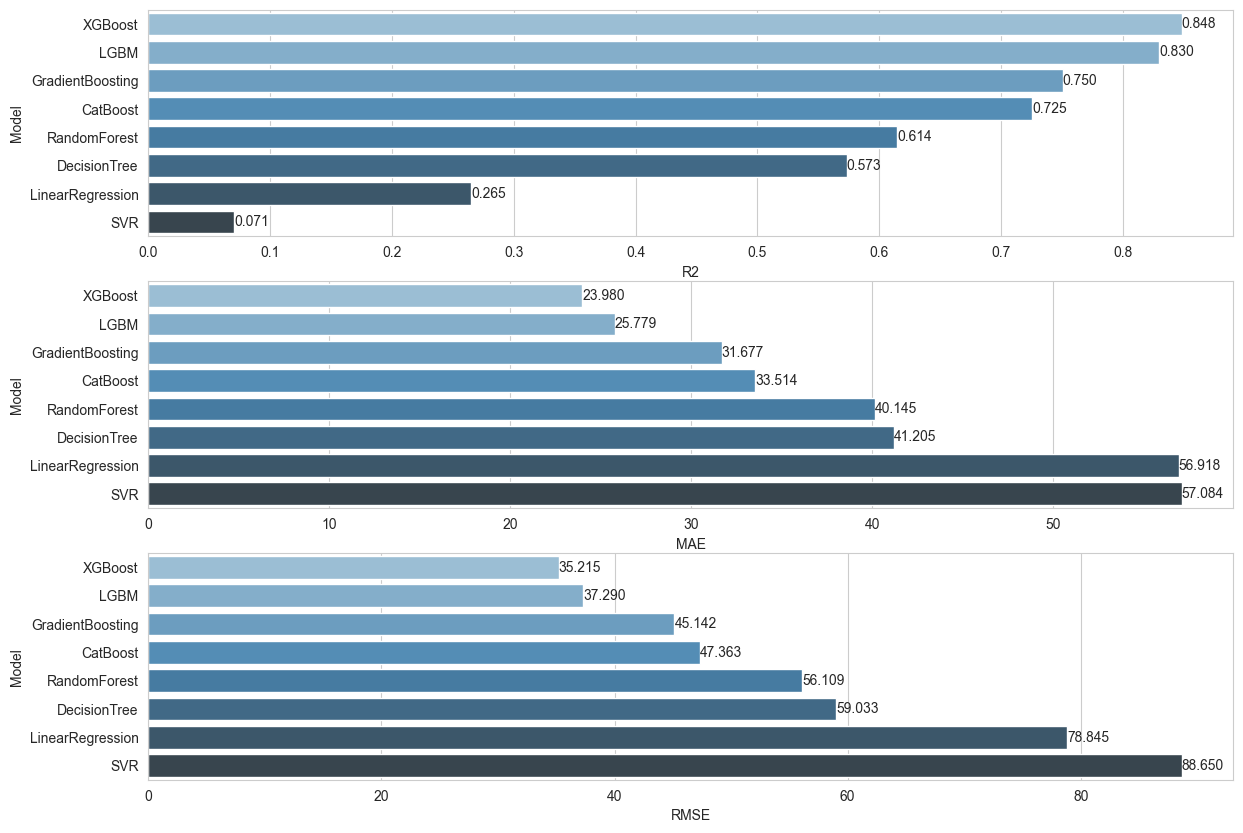

In [47]:
compare = pd.DataFrame({"Model": ["LinearRegression", 'SVR' , "DecisionTree" , "RandomForest", "GradientBoosting",
                                 "XGBoost", "LGBM" , "CatBoost"],
                        "R2": [lr_r2, svr_r2, dt_r2, rf_r2 , gb_r2, xgb_r2, lgb_r2 , cb_r2],
                        "MAE": [lr_mae, svr_mae , dt_mae, rf_mae, gb_mae, xgb_mae, lgb_mae , cb_mae],
                        "RMSE": [lr_rmse, svr_rmse,  dt_rmse , rf_rmse, gb_rmse, xgb_rmse, lgb_rmse , cb_rmse],
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="R2", ascending=False)
ax=sns.barplot(x="R2", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="MAE", ascending=True)
ax=sns.barplot(x="MAE", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="RMSE", ascending=True)
ax=sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Final Model

In [7]:
X_train_full = df_train.drop(target_col, axis = 1)
y_train_full = df_train[target_col]

X_test_full = df_test.drop(target_col, axis = 1)
y_test_full = df_test[target_col]

In [15]:
final_model = XGBRegressor(learning_rate=0.052065707729062986, 
                           n_estimators=592, 
                           subsample=0.8994788856284706, 
                           colsample_bytree=0.6457349751992043, 
                           max_depth=10, 
                           min_child_weight=6, 
                           gamma=0.09780315008749405, 
                           eta=0.07199326195415429, 
                           reg_alpha=9.900581040687172, 
                           reg_lambda=0.6069566382768395,
                           enable_categorical=True,
                           tree_method='gpu_hist')

final_model.fit(X_train_full, y_train_full)

forecasts = final_model.predict(X_test_full)

In [20]:
y_test_full[np.isnan(y_test_full)] = forecasts

C:\Users\Emincan\AppData\Local\Temp\ipykernel_32472\110678954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_full[np.isnan(y_test_full)] = forecasts
C:\Users\Emincan\AppData\Local\Temp\ipykernel_32472\110678954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_full[np.isnan(y_test_full)] = forecasts


In [26]:
train_data = pd.concat([X_train_full, y_train_full], axis=1)
test_data = pd.concat([X_test_full, y_test_full], axis=1)

# Büyük DataFrame oluşturma
big_dataframe = pd.concat([train_data, test_data]).sort_index()

In [33]:
big_dataframe

,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
0,2010,1,1,0,-21,-11.0,1021.0,1,1.79,0,0,114.729042
1,2010,1,1,1,-21,-12.0,1020.0,1,4.92,0,0,96.112549
2,2010,1,1,2,-21,-11.0,1019.0,1,6.71,0,0,79.038101
3,2010,1,1,3,-21,-14.0,1019.0,1,9.84,0,0,74.543114
4,2010,1,1,4,-20,-12.0,1018.0,1,12.97,0,0,53.567242
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,-23,-2.0,1034.0,1,231.97,0,0,8.000000
43820,2014,12,31,20,-22,-3.0,1034.0,1,237.78,0,0,10.000000
43821,2014,12,31,21,-22,-3.0,1034.0,1,242.70,0,0,10.000000
43822,2014,12,31,22,-22,-4.0,1034.0,1,246.72,0,0,8.000000


# Ensemble Model

# There is a Problem. !!!

## Define Models

In [ ]:
class Regressor:
    def __init__(self, n_estimators=2000, device="gpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.models_name = list(self._define_model().keys())
        self.len_models = len(self.models)
        
    def _define_model(self):
        xgb_params = {
                'n_estimators': 15000,
                'learning_rate': 0.00482382842096919,
                'booster': 'gbtree',
                'lambda': 0.000235366507474591,
                'alpha': 0.0000115977765684837,
                'subsample': 0.35955930593108,
                'colsample_bytree': 0.898528184386095,
                'max_depth': 12,
                'min_child_weight': 8,
                'eta': 0.0000784943239744148,
                'gamma': 1.6661346939401E-07,
                'grow_policy': 'lossguide',
                'n_jobs': -1,
                'objective': 'reg:pseudohubererror', # reg:pseudohubererror
                'eval_metric': 'mae',
                'verbosity': 0,
                'random_state': self.random_state,
            }
            
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
            
        
        lgb1_params = {
            'device'            : "gpu" if self.device else "cpu",
            'objective'         : 'regression_l1',
            'metric'            : 'mean_absolute_error',
            'boosting_type'     : 'gbdt',
            'random_state'      : self.random_state,
            'feature_fraction'  : 0.70,
            'learning_rate'     : 0.018,
            'max_depth'         : 16,
            'n_estimators'      : 15_000,
            'num_leaves'        : 80,                    
            'reg_alpha'         : 1.25,
            'reg_lambda'        : 3.5,
            'verbose'           : -1,
        }
        
        cat1_params = {
                    'task_type'           : "CPU",
                    'loss_function'       : 'MAE',
                    'eval_metric'         : 'MAE',
                    'bagging_temperature' : 2.5,
                    'colsample_bylevel'   : 0.8,
                    'iterations'          : 15_000,
                    'learning_rate'       : 0.067,
                    'od_wait'             : 40,
                    'max_depth'           : 9,
                    'l2_leaf_reg'         : 1.575,
                    'min_data_in_leaf'    : 28,
                    'random_strength'     : 0.55, 
                    'max_bin'             : 256,
                    # 'cat_features' : cat_cols
                           }
        
        hist_params = {
            'loss': 'absolute_error',
            'l2_regularization': 0.0104104133357932,
            'early_stopping': True,
            'learning_rate': 0.00627298859709192,
            'max_iter': 20000,
            'n_iter_no_change': 300,
            'max_depth': 16,
            'max_bins': 255,
            'min_samples_leaf': 54,
            'max_leaf_nodes':57,
            'random_state': self.random_state,
            #'categorical_features': []
        }
        
        models = {
#             "lad": LADRegression(),
            "xgb": XGBRegressor(**xgb_study.best_params, enable_categorical = True , tree_method = 'gpu_hist'),
            "lgb": LGBMRegressor(**lgb_study.best_params),
            "cat": CatBoostRegressor(**cb_study.best_params , cat_features= cat_cols),
            # "rf": RandomForestRegressor(**rf_study.best_params),
            # "gb": GradientBoostingRegressor(**gb_study.best_params),
            # "xgb": xgb.XGBRegressor(**xgb_params),
            # "lgb": lgb.LGBMRegressor(**lgb1_params),
            # "cat": CatBoostRegressor(**cat1_params),
            # 'hgb': HistGradientBoostingRegressor(**hist_params),
            # "SVR_rbf": SVR(kernel="rbf", gamma="auto"),
#             "SVR_linear": SVR(kernel="linear", gamma="auto"),
#             "Ridge": RidgeCV(),
#             "Lasso": LassoCV(),
#             "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5, n_jobs=-1),            
            # "RandomForestRegressor": RandomForestRegressor(n_estimators=500, random_state=self.random_state, n_jobs=-1),
#             "SGDRegressor": SGDRegressor(max_iter=2000, early_stopping=True, n_iter_no_change=100, random_state=self.random_state),
            # "MLPRegressor": MLPRegressor(max_iter=500, early_stopping=True, n_iter_no_change=10, random_state=self.random_state),
#             "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=500, n_jobs=-1, random_state=self.random_state),
#             "PLSRegression": PLSRegression(n_components=10, max_iter=1000),
            #"PassiveAggressiveRegressor": PassiveAggressiveRegressor(max_iter=1000, tol=1e-3, random_state=self.random_state),
#             "TheilSenRegressor": TheilSenRegressor(max_iter=1000, random_state=self.random_state, n_jobs=-1),
            # "GradientBoostingRegressor": GradientBoostingRegressor(**gbd_params),
#             "ARDRegression": ARDRegression(n_iter=1000),
#             "HuberRegressor": HuberRegressor(max_iter=2000)
        }
        
        return models

# Optimizer --> Optimize MSE

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import optuna
from functools import partial

class OptunaWeights:
    def __init__(self, random_state, n_trials=100):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 1e-15, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the score for the weighted prediction
        score = mean_squared_error(y_true, np.round(weighted_pred))
        return score

    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        pruner = optuna.pruners.HyperbandPruner()
        self.study = optuna.create_study(sampler=sampler, pruner=pruner, study_name="OptunaWeights", direction='minimize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)
    
    def get_weights(self):
        return self.weights

In [ ]:
import random

# Settings
kfold = True
n_splits = 5 # 10
n_reapts = 1 # 1
random_state = 34 # Istanbul :)
n_estimators = 9999 # 99999
early_stopping_rounds = 100
n_trials = 2000 # 3000
verbose = False
device = 'gpu'

# Fix seed
random.seed(random_state)
random_state_list = random.sample(range(9999), n_reapts)

# To calculate runtime
def sec_to_minsec(t):
    min_ = int(t / 60)
    sec = int(t - min_*60)
    return min_, sec

In [ ]:
X_test = df_test.drop(target_col , axis = 1)

X_train = df_train.drop(target_col , axis = 1)
y_train = df_train[target_col]

In [ ]:
import time
import gc
from copy import deepcopy

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

In [ ]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Initialize an array for storing test predictions
regressor = Regressor(n_estimators, device, random_state)
test_predss = np.zeros((X_test.shape[0]))
oof_predss = np.zeros((X_train.shape[0], n_reapts))
ensemble_score, ensemble_score_ = [], []
weights = []
trained_models = dict(zip([_ for _ in regressor.models_name if ('xgb' in _) or ('lgb' in _) or ('cat' in _)], [[] for _ in range(regressor.len_models)]))
score_dict = dict(zip(regressor.models_name, [[] for _ in range(regressor.len_models)]))

splitter = Splitter(kfold=kfold, n_splits=n_splits)
for i, (X_train_, X_val, y_train_, y_val, val_index) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    # Get a set of regressor models
    regressor = Regressor(n_estimators, device, random_state_list[m])
    models = regressor.models
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        best_iteration = None
        start_time = time.time()
        if ('xgb' in name) or ('lgb' in name) or ('cat' in name):
            early_stopping_rounds_ = int(early_stopping_rounds*1.5) if name != 'cat' else early_stopping_rounds
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds_, verbose=verbose)
            best_iteration = model.best_iteration if name == 'xgb' else model.best_iteration_
        else:
            model.fit(X_train_, y_train_)
        end_time = time.time()
        min_, sec = sec_to_minsec(end_time - start_time)
            
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
        
        test_pred = model.predict(X_test).reshape(-1)
        y_val_pred = model.predict(X_val).reshape(-1)
        
        score = mean_squared_error(y_val, y_val_pred)  # Calculate MSE score instead of F1 score
        score_dict[name].append(score)
        print(f'{blu}{name}{res} [FOLD-{n} SEED-{random_state_list[m]}] MSE Score {blu}{score:.5f}{res} | Best iteration {blu}{best_iteration}{res} | {min_}min {sec}s')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
    
    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state_list[m], n_trials=n_trials)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
    score = mean_squared_error(y_val, y_val_pred)  # Calculate MSE score instead of F1 score
    print(f'{red}>>> Ensemble{res} [FOLD-{n} SEED-{random_state_list[m]}] MSE Score {red}{score:.5f}{res}')
    print(f'{"-" * 60}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    
    # Predict to X_test by the best ensemble weights
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    oof_predss[X_val.index, m] += optweights.predict(oof_preds)
    
    gc.collect()

In [ ]:
optweights.predict(oof_preds).shape

In [ ]:
X_val.index.shape

In [ ]:
oof_predss.shape

In [ ]:
oof_predss

In [ ]:
oof_predss[X_val.index, 1]

In [ ]:
optweights.predict(oof_preds).shape

In [ ]:
from sklearn.metrics import mean_squared_error

# Initialize an array for storing test predictions
regressor = Regressor(n_estimators, device, random_state)
test_predss = np.zeros((X_test.shape[0]))
oof_predss = np.zeros((X_train.shape[0], n_reapts))
ensemble_score, ensemble_score_ = [], []
weights = []
trained_models = dict(zip([_ for _ in regressor.models_name if ('xgb' in _) or ('lgb' in _) or ('cat' in _)], [[] for _ in range(regressor.len_models)]))
score_dict = dict(zip(regressor.models_name, [[] for _ in range(regressor.len_models)]))

splitter = Splitter(kfold=kfold, n_splits=n_splits)
for i, (X_train_, X_val, y_train_, y_val, val_index) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    # Get a set of regressor models
    regressor = Regressor(n_estimators, device, random_state_list[m])
    models = regressor.models
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        best_iteration = None
        start_time = time.time()
        if ('xgb' in name) or ('lgb' in name) or ('cat' in name):
            early_stopping_rounds_ = int(early_stopping_rounds*1.5) if name != 'cat' else early_stopping_rounds
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds_, verbose=verbose)
            best_iteration = model.best_iteration if name == 'xgb' else model.best_iteration_
        else:
            model.fit(X_train_, y_train_)
        end_time = time.time()
        min_, sec = sec_to_minsec(end_time - start_time)
            
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
        
        test_pred = model.predict(X_test).reshape(-1)
        y_val_pred = model.predict(X_val).reshape(-1)
        
        score = mean_squared_error(y_val, y_val_pred)  # Calculate MSE score
        score_dict[name].append(score)
        print(f'{blu}{name}{res} [FOLD-{n} SEED-{random_state_list[m]}] MSE Score {blu}{score:.5f}{res} | Best iteration {blu}{best_iteration}{res} | {min_}min {sec}s')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
    
    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state_list[m], n_trials=n_trials)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
    score = mean_squared_error(y_val, y_val_pred)  # Calculate MSE score
    print(f'{red}>>> Ensemble{res} [FOLD-{n} SEED-{random_state_list[m]}] MSE Score {red}{score:.5f}{res}')
    print(f'{"-" * 60}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    
    # Predict to X_test by the best ensemble weights
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    oof_predss[X_val.index, m] += optweights.predict(oof_preds)
    
    gc.collect()

In [ ]:
models['xgb']

In [ ]:
X_val.shape

In [ ]:
X_val.index

In [ ]:
oof_preds

In [ ]:
oof_predss.shape

In [ ]:
oof_predss[X_val.index, 0].shape

In [ ]:
oof_predss.shape

In [ ]:
len(oof_preds)

In [ ]:
oof_predss[X_val.index, m]